In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.10.0
Num GPUs Available: 1


In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
import numpy as np

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHHENELS=3
EPOCHS=10

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6652 files belonging to 6 classes.


In [5]:
class_name=dataset.class_names
class_name

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_healthy']

In [6]:
len(dataset)

208

In [7]:
208*32

6656

In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 4 4 3 4 1 4 5 1 5 2 3 5 3 4 4 4 4 1 4 1 3 5 1 4 5 1 0 2 1 3 3]


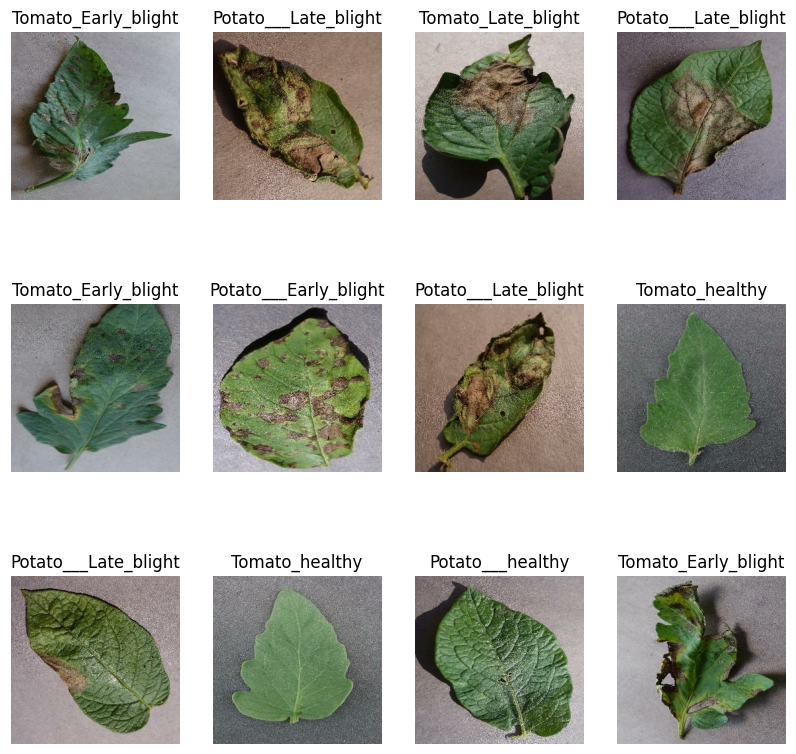

In [9]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):  
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_name[label_batch[i]])


In [10]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,test_ds,val_ds

In [11]:
train_ds,test_ds,val_ds=get_dataset_partitions_tf(dataset)

In [13]:
len(train_ds)

166

In [14]:
len(test_ds)

22

In [15]:
len(val_ds)

20

In [16]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_rescale=tf.keras.Sequential([
   layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [19]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [20]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



In [21]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHHENELS)
n_classes=3

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape) 

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history=model.fit(
    train_ds,
    epochs=15,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
166/166 [==============================] - 259s 1s/step - loss: nan - accuracy: 0.1496 - val_loss: nan - val_accuracy: 0.1641
Epoch 2/15
166/166 [==============================] - 115s 688ms/step - loss: nan - accuracy: 0.1496 - val_loss: nan - val_accuracy: 0.1641
Epoch 3/15
166/166 [==============================] - 130s 781ms/step - loss: nan - accuracy: 0.1496 - val_loss: nan - val_accuracy: 0.1641
Epoch 4/15
166/166 [==============================] - 114s 684ms/step - loss: nan - accuracy: 0.1496 - val_loss: nan - val_accuracy: 0.1641
Epoch 5/15
166/166 [==============================] - 113s 675ms/step - loss: nan - accuracy: 0.1496 - val_loss: nan - val_accuracy: 0.1641
Epoch 6/15
166/166 [==============================] - 126s 757ms/step - loss: nan - accuracy: 0.1496 - val_loss: nan - val_accuracy: 0.1641
Epoch 7/15
166/166 [==============================] - 139s 839ms/step - loss: nan - accuracy: 0.1496 - val_loss: nan - val_accuracy: 0.1641
Epoch 8/15
166/166 [===

In [25]:
score = model.evaluate(test_ds)

22/22 [==============================] - 35s 144ms/step - loss: nan - accuracy: 0.1463


In [26]:
score

[nan, 0.1463068127632141]

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

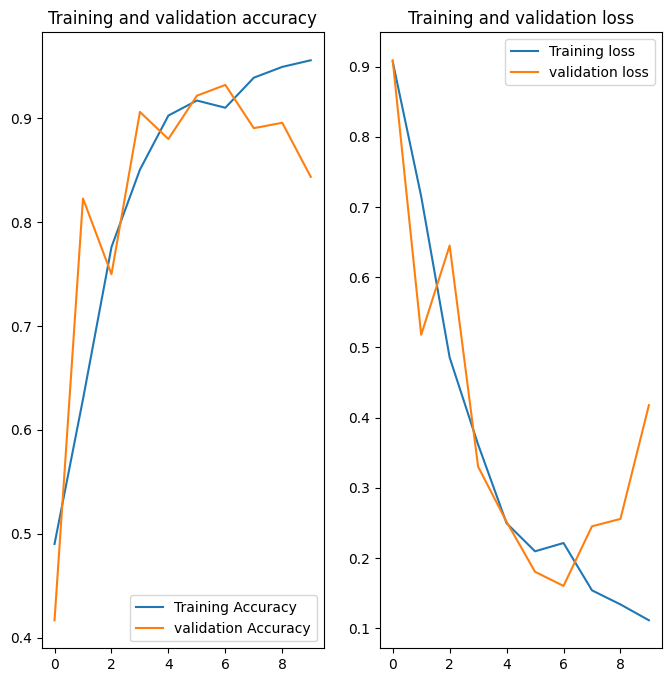

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')
    
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

first image predict
actual label: Tomato_healthy
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Early_blight


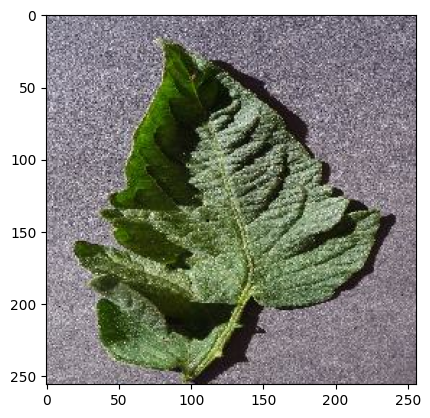

In [27]:
for image_batch,labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()

    print("first image predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction=model.predict(image_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [28]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions= model.predict(img_array)

    predicted_class=class_name[np.argmax(predictions[0])]
    confidence=round(100* (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 20ms/step


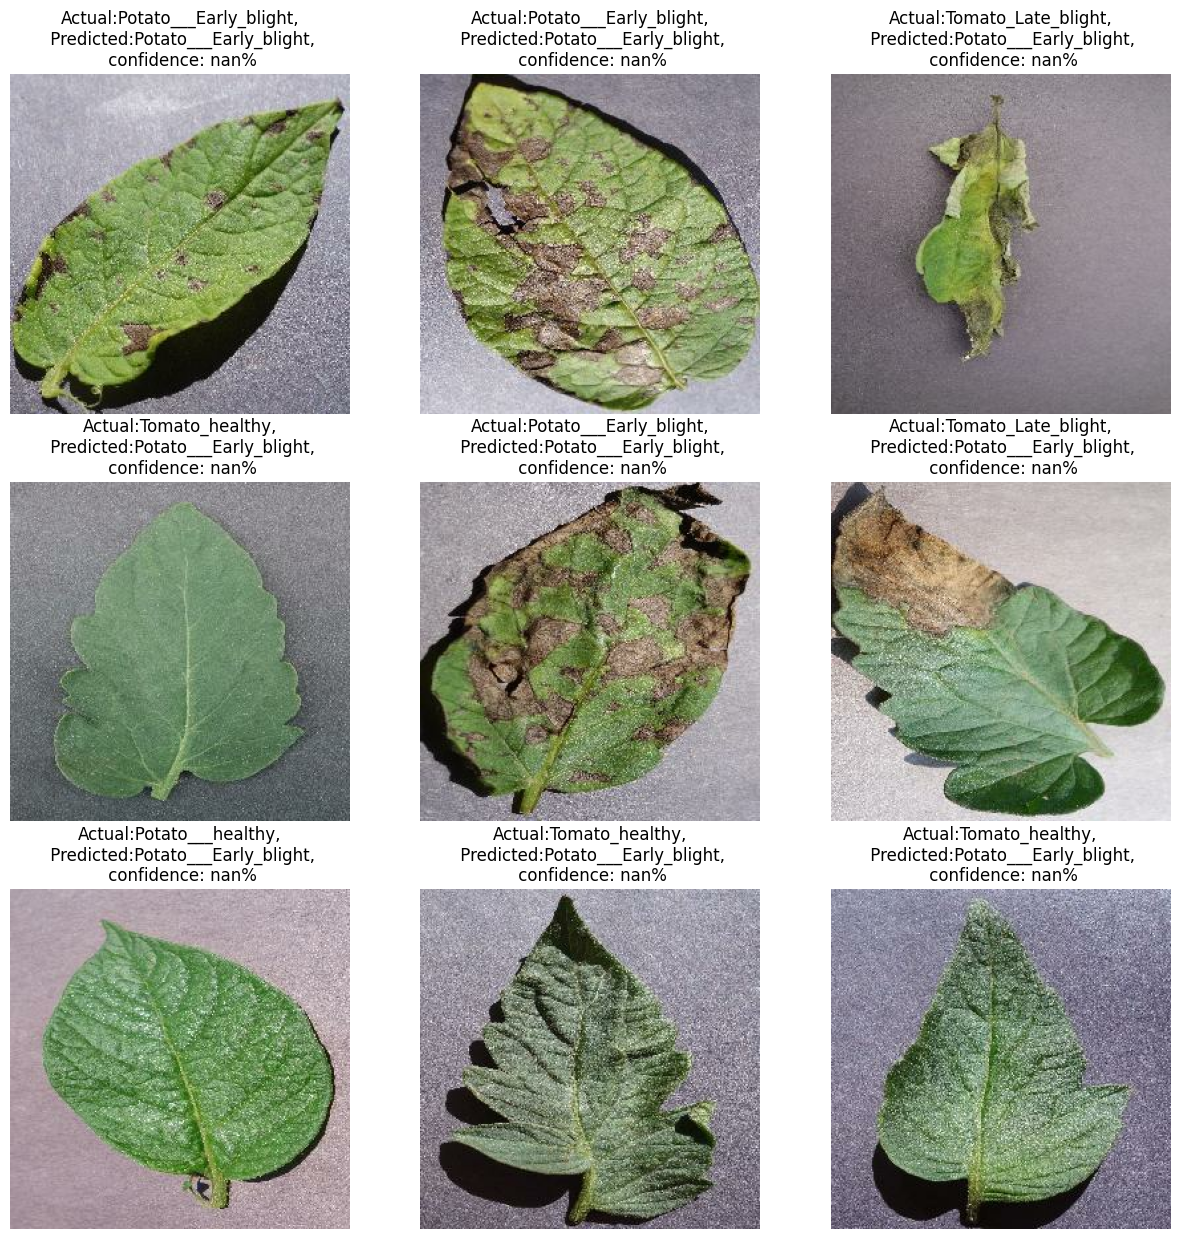

In [29]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_name[labels[i]]

        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n confidence: {confidence}%")
        
        plt.axis("off")

In [33]:
import pathlib
model_version=2
model.export(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/2\assets


INFO:tensorflow:Assets written to: ../saved_models/2\assets


Saved artifact at '../saved_models/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2161776754032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161776869792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161738021200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161738012752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161738019264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161738020496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161738019968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161738021376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161738018384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161738125328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2161738020672: TensorSpec(shape

In [29]:
model.save("../saved_models/model.h5")